In [2]:
import pandas as pd
from dpks import quant_matrix
#%%



In [11]:
raw_results = pd.read_csv(
    '../../data/ms/covid/Charite-DIA-NN_analysis.txt',
    sep="\t"
)

design = pd.read_csv('../../data/ms/covid/design_cropped.tsv', sep= "\t")
design

,sample,group
0,520_TOF1_AF_002_ZeBanC_P1_A1,2
1,520_TOF1_AF_003_ZeBanC_P1_A2,2
2,520_TOF1_AF_004_ZeBanC_P1_A3,2
3,520_TOF1_AF_005_ZeBanC_P1_A4,2
4,520_TOF1_AF_006_ZeBanC_P1_A5,2
...,...,...
682,710_TOF1_LS_473_ZeBanc2_P5_A12,2
683,710_TOF1_LS_475_ZeBanc2_P2_H1,1
684,710_TOF1_LS_476_ZeBanc2_P3_F11,1
685,710_TOF1_LS_477_ZeBanc2_P5_H12,2


In [3]:
print(len(raw_results.index))
raw_results = raw_results[raw_results["Lib.Q.Value"] <= 0.01]
print(len(raw_results.index))
raw_results = raw_results[raw_results["PG.Q.Value"] <= 0.01]
print(len(raw_results.index))
raw_results['File.Name'] = raw_results['File.Name'].apply(lambda x: x.lstrip('20200'))
print(len(raw_results.index))
#raw_results = raw_results[raw_results['File.Name'].isin(design['sample'])]
print(len(raw_results.index))

3370057
3370057
3288181
3288181
3288181


In [29]:
proteotypic_results = raw_results[~raw_results["Protein.Ids"].str.contains(";")]
print(len(proteotypic_results.index))
proteotypic_results

1209091


,File.Name,Protein.Group,Protein.Ids,Protein.Names,Genes,PG.Quantity,PG.Normalised,Genes.Quantity,Genes.Normalised,Genes.MaxLFQ,...,Ms1.Profile.Corr,Ms1.Area,Evidence,CScore,Decoy.Evidence,Decoy.CScore,Fragment.Quant.Raw,Fragment.Quant.Corrected,Fragment.Correlations,MS2.Scan
0,520_TOF1_AF_002_ZeBanC_P1_A1,P62328,P62328,TYB4_HUMAN,TMSB4X,220.610,265.306,220.610,265.306,301.618,...,0.829595,29.2279,5.49635,0.985929,2.92534,6.066790e-02,160.327;47.9471;12.3367;17.9965;8.01309;19.4518;,160.327;47.9471;12.3367;17.9965;8.01309;19.4518;,0.925382;0.950765;0.767365;0.941466;0.936874;0...,5557
1,520_TOF1_AF_002_ZeBanC_P1_A1,P69905,P69905,HBA_HUMAN,HBA1,6214.270,7013.280,6214.270,7013.280,8278.800,...,-0.297725,0.0000,5.06084,0.985997,2.33261,6.734260e-02,25.6638;8.396;6.18597;1.94164;2.32493;0.733528;,25.6638;8.396;6.18597;1.94164;2.32493;0.733528;,0.913847;0.937788;0.867167;0.852997;0.705311;0...,4509
14,520_TOF1_AF_002_ZeBanC_P1_A1,P01023,P01023,A2MG_HUMAN,A2M,4484.740,5181.510,4484.740,5181.510,5564.860,...,0.965522,272.0910,5.63840,0.985862,0.00000,-1.000000e+07,208.891;117.149;68.1133;84.5249;68.6758;78.8047;,208.891;117.149;68.1133;84.5249;68.6758;78.8047;,0.954141;0.911956;0.959016;0.943973;0.880519;0...,4445
15,520_TOF1_AF_002_ZeBanC_P1_A1,P10643,P10643,CO7_HUMAN,C7,335.643,400.744,335.643,400.744,236.321,...,0.860222,16.0188,4.49202,0.985798,2.04361,6.249590e-02,9.37773;7.72504;7.53794;3.46802;1.86744;3.55916;,9.37773;7.72504;7.53794;3.46802;1.86744;3.55916;,0.907433;0.966993;0.891498;0.849189;0.931514;0...,3007
16,520_TOF1_AF_002_ZeBanC_P1_A1,P04114,P04114,APOB_HUMAN,APOB,2041.870,2436.620,2041.870,2436.620,2501.490,...,0.736807,33.9452,5.22918,0.985694,0.00000,-1.000000e+07,15.7771;16.0663;4.34686;3.42235;2.3913;9.54739;,15.7771;16.0663;4.34686;3.42235;2.3913;9.54739;,0.909629;0.83984;0.842932;0.869087;0.801175;0....,4116
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3370030,819_TOF1_AF_125_FlorianKurthValidation_PlasmaB...,P01023,P01023,A2MG_HUMAN,A2M,5855.660,8251.520,5855.660,8251.520,2979.600,...,0.000000,0.0000,2.55920,0.930534,1.74325,4.602170e-02,13.0077;3.21425;1.04716;1.05823;1.93401;0;,13.0077;3.21425;1.04716;1.05823;1.93401;0;,0.262972;0.800641;0.869797;0.240192;0.070399;0;,3392
3370039,819_TOF1_AF_125_FlorianKurthValidation_PlasmaB...,P02763,P02763,A1AG1_HUMAN,ORM1,5234.270,7825.610,5234.270,7825.610,4160.790,...,0.994647,1733.1600,5.91489,0.965826,2.26162,5.983930e-02,2799.55;1165.01;1269.7;411.163;711.493;478.698;,2799.55;1165.01;1269.7;411.163;711.493;478.698;,0.989223;0.993409;0.985437;0.97449;0.993946;0....,6358
3370040,819_TOF1_AF_125_FlorianKurthValidation_PlasmaB...,P02763,P02763,A1AG1_HUMAN,ORM1,5234.270,7825.610,5234.270,7825.610,4160.790,...,0.581056,138.0820,4.67072,0.972404,0.00000,-1.000000e+07,94.3002;44.8947;23.4981;13.3235;24.7459;18.8612;,94.3002;44.8947;23.4981;13.3235;24.7459;18.8612;,0.677483;0.703838;0.861938;0.50749;0.866208;0....,5866
3370041,819_TOF1_AF_125_FlorianKurthValidation_PlasmaB...,P02763,P02763,A1AG1_HUMAN,ORM1,5234.270,7825.610,5234.270,7825.610,4160.790,...,0.573091,10.3276,5.02388,0.971418,2.33473,6.698790e-01,160.229;107.271;45.1579;12.6664;56.0355;8.94392;,160.229;107.271;45.1579;12.6664;56.0355;8.94392;,0.811314;0.959031;0.701741;0.791964;0.845558;0...,5804


In [30]:
proteotypic_results['Precursor.Quantity'].fillna(0, inplace=True)
proteotypic_results['Precursor.Quantity'][(proteotypic_results['Precursor.Quantity'] < 1) & (proteotypic_results['Precursor.Quantity'] >0 )] = 0
print(len(proteotypic_results.index))

1209091


/tmp/ipykernel_21926/1824490564.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  proteotypic_results['Precursor.Quantity'].fillna(0, inplace=True)
/tmp/ipykernel_21926/1824490564.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  proteotypic_results['Precursor.Quantity'][(proteotypic_results['Precursor.Quantity'] < 1) & (proteotypic_results['Precursor.Quantity'] >0 )] = 0
/tmp/ipykernel_21926/1824490564.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning

In [31]:
proteotypic_results = proteotypic_results[
    [
        "File.Name",
        "Protein.Ids",
        "Precursor.Id",
        "Modified.Sequence",
        "Precursor.Charge",
        "RT",
        "Precursor.Quantity"
    ]
].copy()


In [32]:
proteotypic_results["Protein.Ids"].unique().shape

(173,)

In [33]:
def get_id_counts(df):
    samples = df.copy()
    return samples["Protein.Ids"].unique().shape[0], samples["Modified.Sequence"].unique().shape[0], samples["Precursor.Id"].unique().shape[0]

get_id_counts(proteotypic_results)



(173, 1517, 1864)

In [34]:
proteotypic_qm_results = proteotypic_results.pivot(columns="File.Name", index=["Precursor.Id", "Protein.Ids", "Modified.Sequence", "Precursor.Charge"], values="Precursor.Quantity").reset_index().copy()
proteotypic_qm_results

File.Name,Precursor.Id,Protein.Ids,Modified.Sequence,Precursor.Charge,520_TOF1_AF_002_ZeBanC_P1_A1,520_TOF1_AF_003_ZeBanC_P1_A2,520_TOF1_AF_004_ZeBanC_P1_A3,520_TOF1_AF_005_ZeBanC_P1_A4,520_TOF1_AF_006_ZeBanC_P1_A5,520_TOF1_AF_008_ZeBanC_P1_A6,...,819_TOF1_AF_088_FlorianKurthValidation_PlasmaBatch_005,819_TOF1_AF_091_FlorianKurthValidation_P1_F1,819_TOF1_AF_094_FlorianKurthValidation_ZeBanCBatch_005,819_TOF1_AF_097_FlorianKurthValidation_P1_A12,819_TOF1_AF_101_FlorianKurthValidation_PlasmaBatch_006,819_TOF1_AF_102_FlorianKurthValidation_P1_G12,819_TOF1_AF_107_FlorianKurthValidation_QC_006,819_TOF1_AF_113_FlorianKurthValidation_ZeBanCBatch_006,819_TOF1_AF_115_FlorianKurthValidation_P1_B11,819_TOF1_AF_125_FlorianKurthValidation_PlasmaBatch_007
0,(UniMod:1)SDKPDMAEIEKFDK3,P62328,(UniMod:1)SDKPDMAEIEKFDK,3,220.6100,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,(UniMod:1)VLSPADKTNVK2,P69905,(UniMod:1)VLSPADKTNVK,2,40.2458,NaN,5.82414,9.00866,3.93439,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,19.6395,NaN,NaN,NaN
2,AALGKLPQQANDYLNSFNWER3,P04114,AALGKLPQQANDYLNSFNWER,3,NaN,28.52320,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,47.5919,NaN,NaN
3,AAQVTIQSSGTFSSK2,P01023,AAQVTIQSSGTFSSK,2,404.8440,261.52200,309.50500,191.27500,253.86500,119.1580,...,301.810,617.0380,493.1070,568.3220,320.1340,639.2040,697.7250,493.7040,594.0150,292.985
4,AASGTQNNVLR2,P10643,AASGTQNNVLR,2,20.5708,51.89540,37.39170,31.29500,46.19500,21.4525,...,NaN,20.6017,50.6694,30.3837,17.0675,31.3340,62.9789,39.3385,37.1334,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1859,YVGNMHGNEALGR3,P15169,YVGNMHGNEALGR,3,56.7169,39.88590,33.40020,31.08900,45.54610,19.1605,...,NaN,27.3800,29.7964,21.5234,52.4819,28.2375,46.3203,NaN,25.3445,NaN
1860,YVYIAELLAHK2,P27169,YVYIAELLAHK,2,43.8960,42.77410,40.04700,35.44940,65.88720,28.1282,...,NaN,163.2120,95.8880,177.5340,NaN,149.5290,125.6110,107.5840,164.4830,NaN
1861,YWC(UniMod:4)LWEGAQNGR2,P01833,YWC(UniMod:4)LWEGAQNGR,2,29.1415,14.76390,NaN,NaN,19.18200,NaN,...,NaN,NaN,24.7266,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1862,YWNDC(UniMod:4)EPPDSR2,P04196,YWNDC(UniMod:4)EPPDSR,2,15.2781,8.71576,9.76142,NaN,7.68622,NaN,...,NaN,NaN,18.6264,24.6969,NaN,NaN,NaN,NaN,12.1683,NaN


In [36]:
proteotypic_qm_results.rename(
    columns={
        "Precursor.Id": "PrecursorId",
        "Protein.Ids": "Protein",
        "Modified.Sequence": "PeptideSequence",
        "Precursor.Charge": "Charge"
    },
    inplace=True
)

In [37]:
proteotypic_qm_results = proteotypic_qm_results[['PrecursorId','Protein','PeptideSequence','Charge'] + design['sample'].tolist()]

In [38]:
import numpy as np
proteotypic_qm_results.replace(0, np.nan, inplace=True)

proteotypic_qm_results

/tmp/ipykernel_21926/3801488654.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  proteotypic_qm_results.replace(0, np.nan, inplace=True)


File.Name,PrecursorId,Protein,PeptideSequence,Charge,520_TOF1_AF_002_ZeBanC_P1_A1,520_TOF1_AF_003_ZeBanC_P1_A2,520_TOF1_AF_004_ZeBanC_P1_A3,520_TOF1_AF_005_ZeBanC_P1_A4,520_TOF1_AF_006_ZeBanC_P1_A5,520_TOF1_AF_008_ZeBanC_P1_A6,...,710_TOF1_LS_465_ZeBanc2_P4_G11,710_TOF1_LS_466_ZeBanc2_P1_F9,710_TOF1_LS_467_ZeBanc2_P1_H12,710_TOF1_LS_470_ZeBanc2_P2_A9,710_TOF1_LS_471_ZeBanc2_P4_A8,710_TOF1_LS_473_ZeBanc2_P5_A12,710_TOF1_LS_475_ZeBanc2_P2_H1,710_TOF1_LS_476_ZeBanc2_P3_F11,710_TOF1_LS_477_ZeBanc2_P5_H12,710_TOF1_LS_478_ZeBanc2_P3_C2
0,(UniMod:1)SDKPDMAEIEKFDK3,P62328,(UniMod:1)SDKPDMAEIEKFDK,3,220.6100,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,(UniMod:1)VLSPADKTNVK2,P69905,(UniMod:1)VLSPADKTNVK,2,40.2458,NaN,5.82414,9.00866,3.93439,NaN,...,NaN,NaN,22.2218,10.43220,NaN,NaN,NaN,17.2096,63.1904,22.2713
2,AALGKLPQQANDYLNSFNWER3,P04114,AALGKLPQQANDYLNSFNWER,3,NaN,28.52320,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,40.0208,51.9256,NaN,38.8194,NaN,NaN
3,AAQVTIQSSGTFSSK2,P01023,AAQVTIQSSGTFSSK,2,404.8440,261.52200,309.50500,191.27500,253.86500,119.1580,...,653.3980,455.5970,343.0330,554.37700,306.5040,245.6560,322.2700,490.1450,378.4260,237.7680
4,AASGTQNNVLR2,P10643,AASGTQNNVLR,2,20.5708,51.89540,37.39170,31.29500,46.19500,21.4525,...,80.1722,24.2579,30.1739,6.35926,45.6749,41.7987,36.3325,22.9815,41.1464,24.4753
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1859,YVGNMHGNEALGR3,P15169,YVGNMHGNEALGR,3,56.7169,39.88590,33.40020,31.08900,45.54610,19.1605,...,35.4616,40.6806,37.4824,42.73160,27.6304,41.1357,36.8754,22.8617,20.8796,22.5779
1860,YVYIAELLAHK2,P27169,YVYIAELLAHK,2,43.8960,42.77410,40.04700,35.44940,65.88720,28.1282,...,93.1601,45.7400,47.0180,35.63630,81.5831,31.3012,156.6230,81.1315,28.1723,156.7710
1861,YWC(UniMod:4)LWEGAQNGR2,P01833,YWC(UniMod:4)LWEGAQNGR,2,29.1415,14.76390,NaN,NaN,19.18200,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1862,YWNDC(UniMod:4)EPPDSR2,P04196,YWNDC(UniMod:4)EPPDSR,2,15.2781,8.71576,9.76142,NaN,7.68622,NaN,...,NaN,NaN,NaN,NaN,NaN,25.3935,NaN,NaN,NaN,NaN


In [39]:
from dpks.quant_matrix import QuantMatrix
sample_columns = [col for col in proteotypic_qm_results.columns if col not in ["File.Name", "PrecursorId", "Protein", "PeptideSequence", "Charge"]]

quant_matrix = QuantMatrix(
    quantification_file=proteotypic_qm_results,
    design_matrix_file=design
)
quant_matrix = quant_matrix.normalize(
    method="mean",
    log_transform=True
)
quant_matrix = quant_matrix.quantify(method="maxlfq", level="protein", threads=12)

In [31]:
quant_matrix.to_df().to_csv('../../data/ms/covid/AaronQM.tsv', sep="\t", index=False)

In [32]:
proteotypic_qm_results.to_csv('../../data/ms/covid/Aaron_data_cropped.tsv', sep="\t", index=False)

173


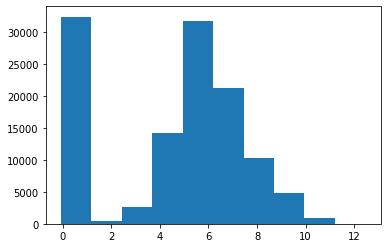

In [40]:
import matplotlib.pyplot as plt
plt.hist(quant_matrix.to_df()[quant_matrix.get_samples(group=2)+quant_matrix.get_samples(group=1)].fillna(0).values.flatten())
print(len(quant_matrix.to_df()['Protein'].unique()))

In [63]:
quant_matrix.to_df()

,Protein,520_TOF1_AF_002_ZeBanC_P1_A1,520_TOF1_AF_003_ZeBanC_P1_A2,520_TOF1_AF_004_ZeBanC_P1_A3,520_TOF1_AF_005_ZeBanC_P1_A4,520_TOF1_AF_006_ZeBanC_P1_A5,520_TOF1_AF_008_ZeBanC_P1_A6,520_TOF1_AF_010_ZeBanC_P1_A8,520_TOF1_AF_011_ZeBanC_P1_A9,520_TOF1_AF_014_ZeBanC_P1_A11,...,710_TOF1_LS_465_ZeBanc2_P4_G11,710_TOF1_LS_466_ZeBanc2_P1_F9,710_TOF1_LS_467_ZeBanc2_P1_H12,710_TOF1_LS_470_ZeBanc2_P2_A9,710_TOF1_LS_471_ZeBanc2_P4_A8,710_TOF1_LS_473_ZeBanc2_P5_A12,710_TOF1_LS_475_ZeBanc2_P2_H1,710_TOF1_LS_476_ZeBanc2_P3_F11,710_TOF1_LS_477_ZeBanc2_P5_H12,710_TOF1_LS_478_ZeBanc2_P3_C2
0,P62328,5.788764,NaN,NaN,NaN,NaN,NaN,NaN,5.753685,5.903652,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,P69905,8.185262,4.295320,5.671723,5.828952,4.337005,4.526822,4.650620,5.034944,5.806138,...,6.649666,5.125297,7.288072,6.010692,6.710050,6.023762,5.949476,6.819253,9.215400,7.471658
2,P05154;G3V5I3,4.127780,4.568186,4.166677,4.376835,4.032644,NaN,4.183494,4.302135,4.465254,...,NaN,4.990019,5.405803,NaN,4.358632,5.275762,5.135832,5.209166,5.034022,4.509934
3,P02768;H0YA55;D6RHD5;B7WNR0;A0A0C4DGB6,9.223858,9.389203,9.333281,9.851417,9.157305,8.829922,9.413935,9.165846,9.612440,...,9.277028,9.006148,10.219698,9.667601,9.651869,10.260414,9.809500,9.862663,9.959879,9.833798
4,P02766;A0A087WT59;A0A087WV45,5.284073,6.667855,5.943770,4.889650,4.762360,4.888388,4.723877,5.507224,5.537488,...,5.439045,4.810324,5.265237,4.770186,6.845381,6.090954,5.499888,6.261748,6.426025,5.506142
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
534,P02768;H0YA55;H7C013;A0A0C4DGB6,15.040989,15.086296,15.171629,15.055463,15.028394,15.010118,15.110303,14.744795,15.688764,...,15.139637,14.864008,15.620123,15.400978,15.402530,15.440237,15.401023,15.615614,15.626435,15.561497
535,P00915;E5RHP7;E5RG43;E5RH81;E5RFE7;E5RIF9;H0YBE2,4.222206,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
536,P00915;E5RJF6;E5RJI8;E5RHP7;E5RG81;E5RG43;E5RH...,6.681129,NaN,NaN,NaN,3.120558,NaN,NaN,NaN,3.562300,...,4.655855,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.289671,NaN
537,P04003;F2Z2V7;A6PVY5,11.131279,10.809756,10.873502,10.617521,10.749227,10.233165,10.554672,10.212850,10.495295,...,10.890312,10.807639,10.167570,10.484988,10.370789,11.315223,10.312300,9.846277,9.809504,9.645216


In [3]:
q = pd.read_csv('../../data/ms/covid/QuantMatrix.tsv', sep="\t")
qa = pd.read_csv('../../data/ms/covid/AaronQM.tsv', sep="\t")
print(len(q['Protein'].unique()))
print(len(qa['Protein'].unique()))

269
173


In [6]:
qa[qa['Protein'] == "P06396"]

,Protein,520_TOF1_AF_002_ZeBanC_P1_A1,520_TOF1_AF_003_ZeBanC_P1_A2,520_TOF1_AF_004_ZeBanC_P1_A3,520_TOF1_AF_005_ZeBanC_P1_A4,520_TOF1_AF_006_ZeBanC_P1_A5,520_TOF1_AF_008_ZeBanC_P1_A6,520_TOF1_AF_010_ZeBanC_P1_A8,520_TOF1_AF_011_ZeBanC_P1_A9,520_TOF1_AF_014_ZeBanC_P1_A11,...,710_TOF1_LS_465_ZeBanc2_P4_G11,710_TOF1_LS_466_ZeBanc2_P1_F9,710_TOF1_LS_467_ZeBanc2_P1_H12,710_TOF1_LS_470_ZeBanc2_P2_A9,710_TOF1_LS_471_ZeBanc2_P4_A8,710_TOF1_LS_473_ZeBanc2_P5_A12,710_TOF1_LS_475_ZeBanc2_P2_H1,710_TOF1_LS_476_ZeBanc2_P3_F11,710_TOF1_LS_477_ZeBanc2_P5_H12,710_TOF1_LS_478_ZeBanc2_P3_C2
89,P06396,4.052616,4.615219,4.443128,4.834682,4.246965,4.161691,4.626352,4.228371,5.242067,...,6.170225,4.594229,5.236958,3.513571,5.947159,5.513355,5.79169,6.466217,5.854211,6.491913
